# Assignment #2: Application of Sampling
### Sofia Gamershmidt
### s.gamershmidt@innopolis.university

# Solving Travelling Salesman Problem using Simulation Annealing


#### Firstly, let`s analyze and prepare the data

In [1]:
import pandas as pd
city_df = pd.read_csv('city.csv')
city_df.head()

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,"Респ Адыгея, г Адыгейск",385200.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Адыгейск,...,4,0,79403000000,79703000001,107,UTC+3,44.878414,39.190289,12689,1969
1,г Майкоп,385000.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Майкоп,...,4,2,79401000000,79701000001,105,UTC+3,44.609827,40.100661,144055,1857
2,г Горно-Алтайск,649000.0,Россия,Сибирский,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,...,4,2,84401000000,84701000001,400,UTC+7,51.958103,85.960324,62861,1830
3,"Алтайский край, г Алейск",658125.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Алейск,...,4,0,1403000000,1703000001,2201,UTC+7,52.492251,82.779361,28528,1913
4,г Барнаул,656000.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Барнаул,...,4,2,1401000000,1701000001,2200,UTC+7,53.347997,83.779806,635585,1730


In [2]:
city_df.columns

Index(['address', 'postal_code', 'country', 'federal_district', 'region_type',
       'region', 'area_type', 'area', 'city_type', 'city', 'settlement_type',
       'settlement', 'kladr_id', 'fias_id', 'fias_level', 'capital_marker',
       'okato', 'oktmo', 'tax_office', 'timezone', 'geo_lat', 'geo_lon',
       'population', 'foundation_year'],
      dtype='object')

In [3]:
city_df = city_df.sort_values(by='population', ascending=False).reset_index(drop=True)
city_df = city_df.head(30)
city_df

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,г Москва,101000.0,Россия,Центральный,г,Москва,NaN,NaN,NaN,NaN,...,1,0,45000000000,45000000,7700,UTC+3,55.754047,37.620405,11514330,1147
1,г Санкт-Петербург,190000.0,Россия,Северо-Западный,г,Санкт-Петербург,NaN,NaN,NaN,NaN,...,1,0,40000000000,40000000,7800,UTC+3,59.939131,30.315900,4848742,1703
2,г Новосибирск,630000.0,Россия,Сибирский,обл,Новосибирская,NaN,NaN,г,Новосибирск,...,4,2,50401000000,50701000001,5400,UTC+7,55.028191,82.921149,1498921,1893
3,г Екатеринбург,620000.0,Россия,Уральский,обл,Свердловская,NaN,NaN,г,Екатеринбург,...,4,2,65401000000,65701000001,6600,UTC+5,56.838522,60.605491,1377738,1723
4,г Нижний Новгород,603000.0,Россия,Приволжский,обл,Нижегородская,NaN,NaN,г,Нижний Новгород,...,4,2,22401000000,22701000001,5200,UTC+3,56.324063,44.005391,1250615,1221
5,г Казань,420000.0,Россия,Приволжский,Респ,Татарстан,NaN,NaN,г,Казань,...,4,2,92401000000,92701000001,1600,UTC+3,55.794358,49.111497,1216965,1005
6,г Самара,443000.0,Россия,Приволжский,обл,Самарская,NaN,NaN,г,Самара,...,4,2,36401000000,36701000,6300,UTC+4,53.195031,50.106952,1164900,1586
7,г Омск,644000.0,Россия,Сибирский,обл,Омская,NaN,NaN,г,Омск,...,4,2,52401000000,52701000001,5500,UTC+6,54.984857,73.367452,1154000,1716
8,г Челябинск,454000.0,Россия,Уральский,обл,Челябинская,NaN,NaN,г,Челябинск,...,4,2,75401000000,75701000001,7400,UTC+5,55.160262,61.400808,1130273,1736
9,г Ростов-на-Дону,344000.0,Россия,Южный,обл,Ростовская,NaN,NaN,г,Ростов-на-Дону,...,4,2,60401000000,60701000001,6100,UTC+3,47.222457,39.718803,1091544,1749


Then, calculate distances between cities

In [4]:
!pip install geopy
from geopy.distance import great_circle 
"""
It is the length of the shortest path between 2 points on a sphere. 
In this case, the earth is assumed to be a perfect sphere.
"""
def calculate_dist(lat1, lon1, lat2, lon2):
    return great_circle((lat1, lon1), (lat2, lon2)).km

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import numpy as np
def calculate_distance_matrix(city):
    num_cities = len(city)
    distance_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            city1 = city.iloc[i]
            city2 = city.iloc[j]
            distance_matrix[i, j] = calculate_dist(city1['geo_lat'], city1['geo_lon'], city2['geo_lat'], city2['geo_lon'])
    
    return distance_matrix

distance_matrix = calculate_distance_matrix(city_df)
np.round(distance_matrix[0]) 

array([   0.,  634., 2811., 1417.,  401.,  718.,  854., 2235., 1493.,
        960., 1164.,  913., 1154., 3352.,  467.,  726., 1195.,  796.,
       2933.,  967.,  703., 6415.,  250., 4202., 1710., 1586., 6140.,
       1226., 3120., 2982.])

In [6]:
def lon_to_x(lon):
    # Conversion from longitude to x-coordinate
    return great_circle((0, 0), (0, lon)).km

def lat_to_y(lat):
    # Conversion from latitude to y-coordinate
    return great_circle((0, 0), (lat, 0)).km

In [7]:
coordinates = np.zeros((len(city_df),2))
num_cities = len(city_df)
for i in range(num_cities):
    city1 = city_df.iloc[i]
    coordinates[i]=[lon_to_x(city1['geo_lon']), lat_to_y(city1['geo_lat'])]
city_names = [name.split(' ')[-1] for name in list(city_df.address)]
coordinates

array([[ 4183.20408371,  6199.57593525],
       [ 3370.97908315,  6664.93672326],
       [ 9220.42409444,  6118.86430544],
       [ 6739.03265701,  6320.16416807],
       [ 4893.18316992,  6262.95886761],
       [ 5460.95707633,  6204.05835363],
       [ 5571.64670057,  5915.02588128],
       [ 8158.09993441,  6114.0457332 ],
       [ 6827.46796405,  6133.54999582],
       [ 4416.53562501,  5250.9050153 ],
       [ 6222.23745995,  6086.25668072],
       [ 4950.07531166,  5415.97940997],
       [ 6252.96695523,  6450.45552853],
       [10324.73935432,  6227.96857688],
       [ 4358.5051236 ,  5744.26388031],
       [ 5118.7830613 ,  5730.27818522],
       [ 4333.93565805,  5008.24440663],
       [ 5491.85877943,  5951.22034805],
       [ 9315.90258704,  5932.03497069],
       [ 5916.85604116,  6321.74496186],
       [ 5379.04535134,  6038.77610198],
       [14664.67380922,  4794.34175992],
       [ 4436.43266202,  6407.23282082],
       [11595.50634901,  5813.99102594],
       [ 7287.10

#### Plot top-30 cities in Russia by population

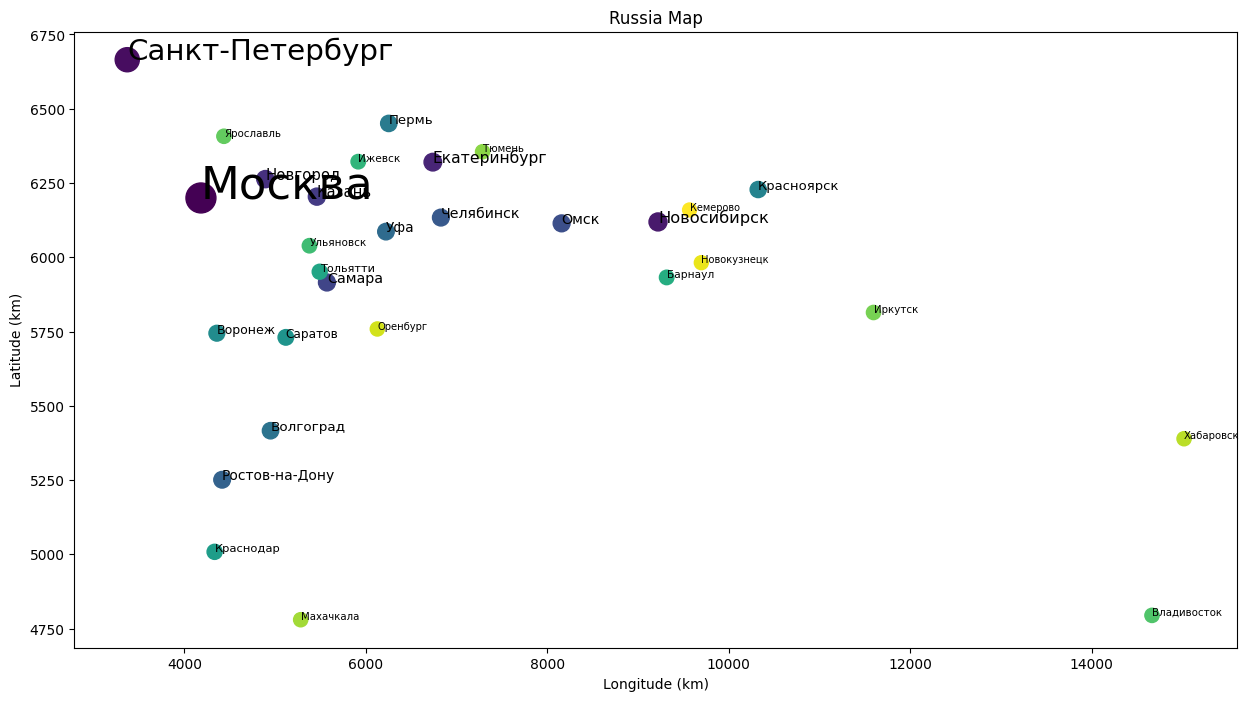

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
colors = np.linspace(0, 1, len(coordinates))
cmap = plt.get_cmap('viridis')
color_map = [cmap(c) for c in colors]
city_sizes = np.sqrt(city_df['population'] / city_df['population'].min()) * 100
plt.scatter(coordinates[:,0], coordinates[:,1],s=city_sizes, marker='o', c=color_map)

for i, name in enumerate(city_names):
    plt.annotate(name, (coordinates[i,0], coordinates[i,1]), fontsize=city_sizes[i]*0.07)

plt.xlabel('Longitude (km)')
plt.ylabel('Latitude (km)')
plt.title('Russia Map')


plt.show()


## Simulatd annealing solving TSP

**The procedure for SA:**

1. Sample initial $x_0$, set time step $ t= 0 $;
2. Set initial temperature $T$;
3. Generate $ x'$ from $ g(x' |x_t) $;
4. Calculate acceptance ratio $\alpha =\frac{p^*(x')}{p^*(x_t)} $;
5. Generate $ u$ from $U(0, 1) $. If $ u\leq \alpha $, accept the new state $x_{t+1} = x' $, otherwise propagate the old state. Pass $x_{t+ 1}$ to the output of the sampler;
6. Anneal temperature $T$;
7. Increment time step $t $;
8. Repeat steps 2-8 until cooled down.



In [9]:
def calculate_distance(path, distance_matrix):
    total_dist = 0
    for i in range(len(path)):
        total_dist += distance_matrix[path[i-1]][path[i]]
    return total_dist

Using optimisation proposal from 6th assignment page

In [10]:
import random
# Randomly change path by swapping elements
def swap_elements(path):
    i, j = random.sample(range(len(path)), 2)
    path[i], path[j] = path[j], path[i]
    return path

Acceptance probability: $α = \frac{p^*(x_{ \text{ new}})} {p^*(x)} = e^{-(d(x_{\text{new}}) - d(x))/t }$; 

The acceptance probability formula was taken from https://www.hindawi.com/journals/cin/2016/1712630/ (2.2)

In an explicit form:  
$
α =\begin{cases} 
    1 , &\text{if } d( x_{\text{new }})\leq d(x), \\
    e^{ -(d(x_{\text{new}}) - d(x))/t} , &\text{otherwise}.
\end{cases}
$


In [11]:
def acceptance_probability(distance, new_distance, temp):
    if temp < 1e-10:
        temp = 1e-10
    if new_distance < distance:
        return 1.0
    return np.exp( - (new_distance - distance) / temp)

if temp < 1e-10:

        temp = 1e-10

this element exists because if i would assign temp to 0 (number for which tends final expression in such case)
the solution would stack at some big number and won`t improve because of 0 probability to improve.


My realization of SA for TSP problem

In [12]:
def tsp_simulated_annealing(init_path, initial_temp, cooling_rate,
                            distance_matrix, stop_temp = 1e-50, max_steps=10000, ignore_cooling = True):
    solution= init_path
    distance=calculate_distance(init_path, distance_matrix)

    step = 0
    temp = initial_temp
    best_step = 0
    result = [(solution, distance, temp, best_step)]
    while step < max_steps or temp > stop_temp:
        new_solution = swap_elements(solution.copy())
        new_distance= calculate_distance(new_solution, distance_matrix)

        acceptance_ratio = acceptance_probability(distance, new_distance, temp)

        if acceptance_ratio> np.random.random():
            solution = new_solution
            distance = new_distance
            best_step = step

        temp = temp *cooling_rate
        step += 1
        result.append((solution, distance, temp, best_step))
    
    return result


### Finding optimal path

Start with randomly generated path

In [13]:
init_path = list(range(len(city_df)))
random.shuffle(init_path)
init_path

[3,
 19,
 12,
 26,
 22,
 28,
 10,
 7,
 6,
 11,
 20,
 29,
 18,
 9,
 0,
 8,
 25,
 27,
 16,
 4,
 2,
 5,
 23,
 17,
 15,
 13,
 1,
 24,
 21,
 14]

In [14]:
initial_temp = 10000
max_steps = 5000
cooling_rate = 0.98
result = tsp_simulated_annealing(init_path, initial_temp, cooling_rate, distance_matrix, max_steps)


Introduce function to visualize the solution

In [15]:
def plot_map(coordinates, city_names, results, index):
    fig, ax = plt.subplots(figsize=(15, 8))
    colors = np.linspace(0, 1, len(coordinates))
    cmap = plt.get_cmap('viridis')
    color_map = [cmap(c) for c in colors]
    city_sizes = np.sqrt(city_df['population'] / city_df['population'].min()) * 100
    plt.scatter(coordinates[:,0], coordinates[:,1],s=city_sizes, marker='o', c=color_map)
    
    for i, name in enumerate(city_names):
        plt.annotate(name, (coordinates[i,0], coordinates[i,1]), fontsize=city_sizes[i]*0.07)
    
    plt.xlabel('Longitude (km)')
    plt.ylabel('Latitude (km)')
    plt.title('Russia Map')
    line, = ax.plot([], [], 'b-', lw=2)
    bst_solution, distance, temp, _ = results[index]
    ax.set_title(f"TSP route: {round(distance)}, Temperature: {round(temp,1)}")
    path = coordinates[bst_solution]
    path = np.vstack([path, path[0]])  
    line.set_data(path[:, 0], path[:, 1])
    plt.show()

### Initial route 

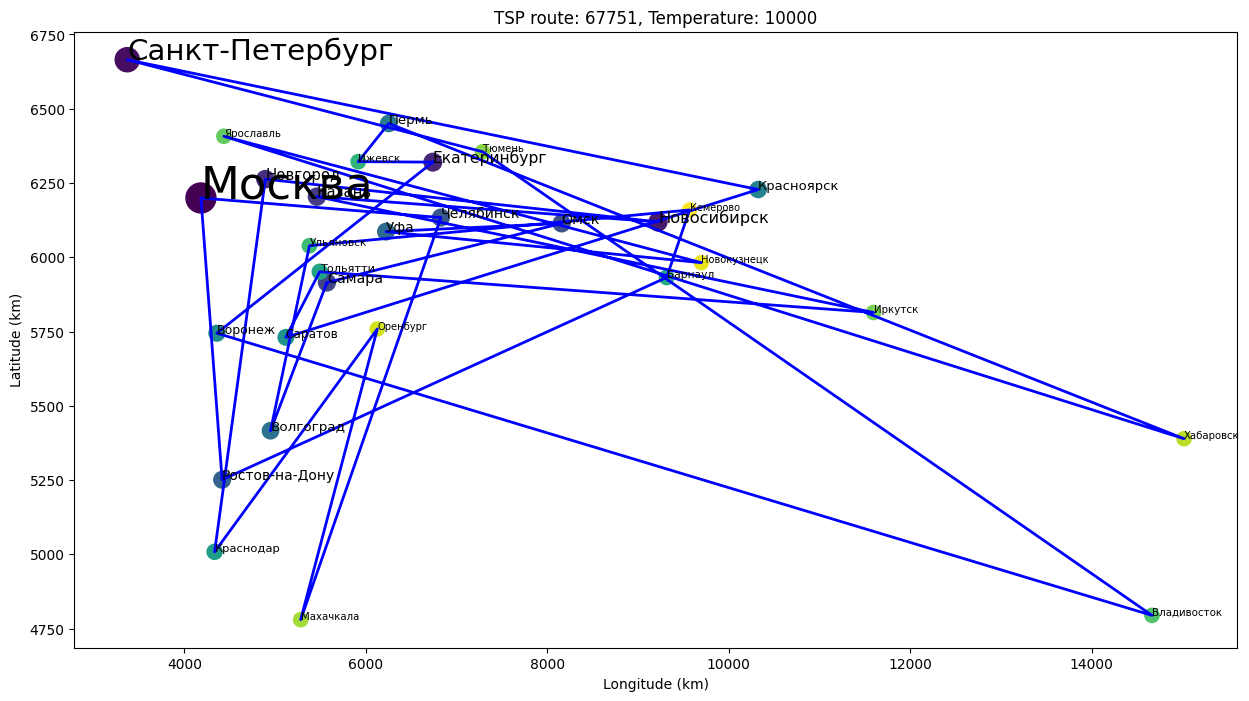

In [16]:
plot_map(coordinates, city_names, result, 0)

### Best route

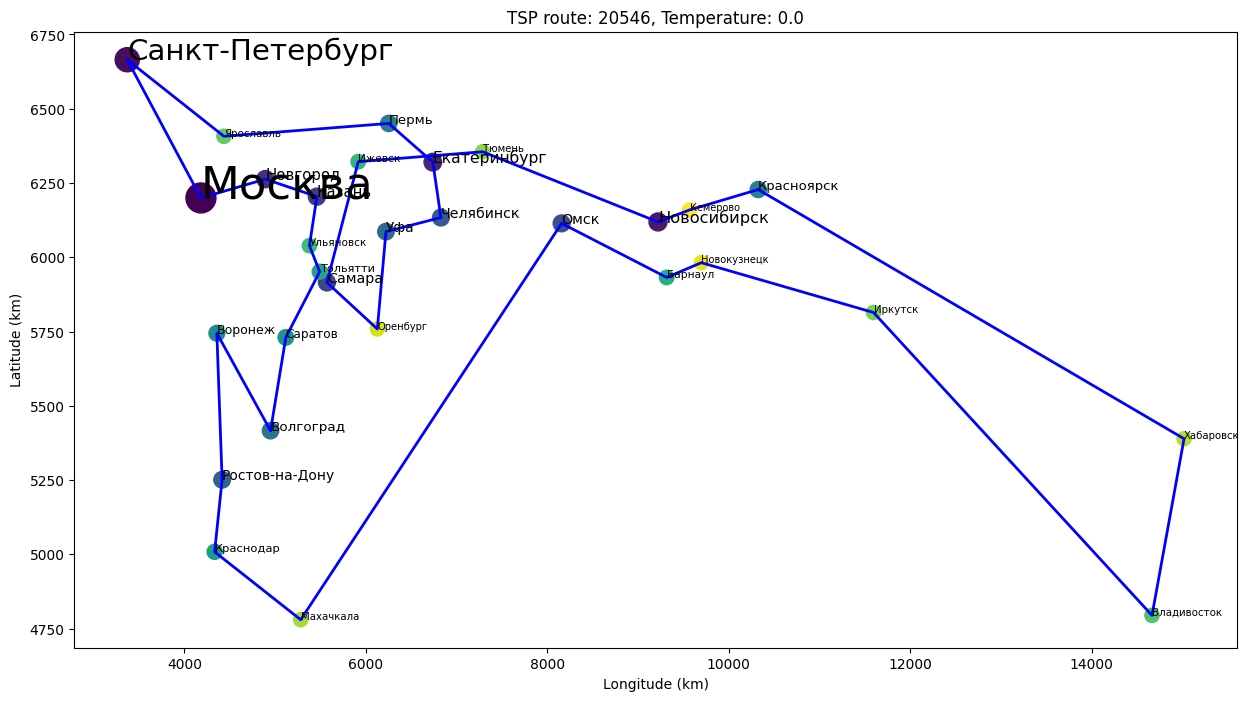

In [17]:
plot_map(coordinates, city_names, result, -1)

## Statistics collection

Let`s evaluate cooling rates

In [18]:
initial_temp = 15000
cooling_rates = [0, 0.7, 0.96]
result_list = []

result_list = [list(tsp_simulated_annealing(init_path, initial_temp, cooling_rate, distance_matrix))
               for cooling_rate in cooling_rates]


In [19]:
min_distance = float('inf')
min_index = None

for i, result in enumerate(result_list):
    distance = result[-1][1]
    if distance < min_distance:
        min_distance = distance
        min_index = i

min_index

2

In [20]:
best_distance = result_list[min_index][-1][1]
best_rate = cooling_rates[min_index]
print(best_distance, best_rate)

22768.357031287742 0.96


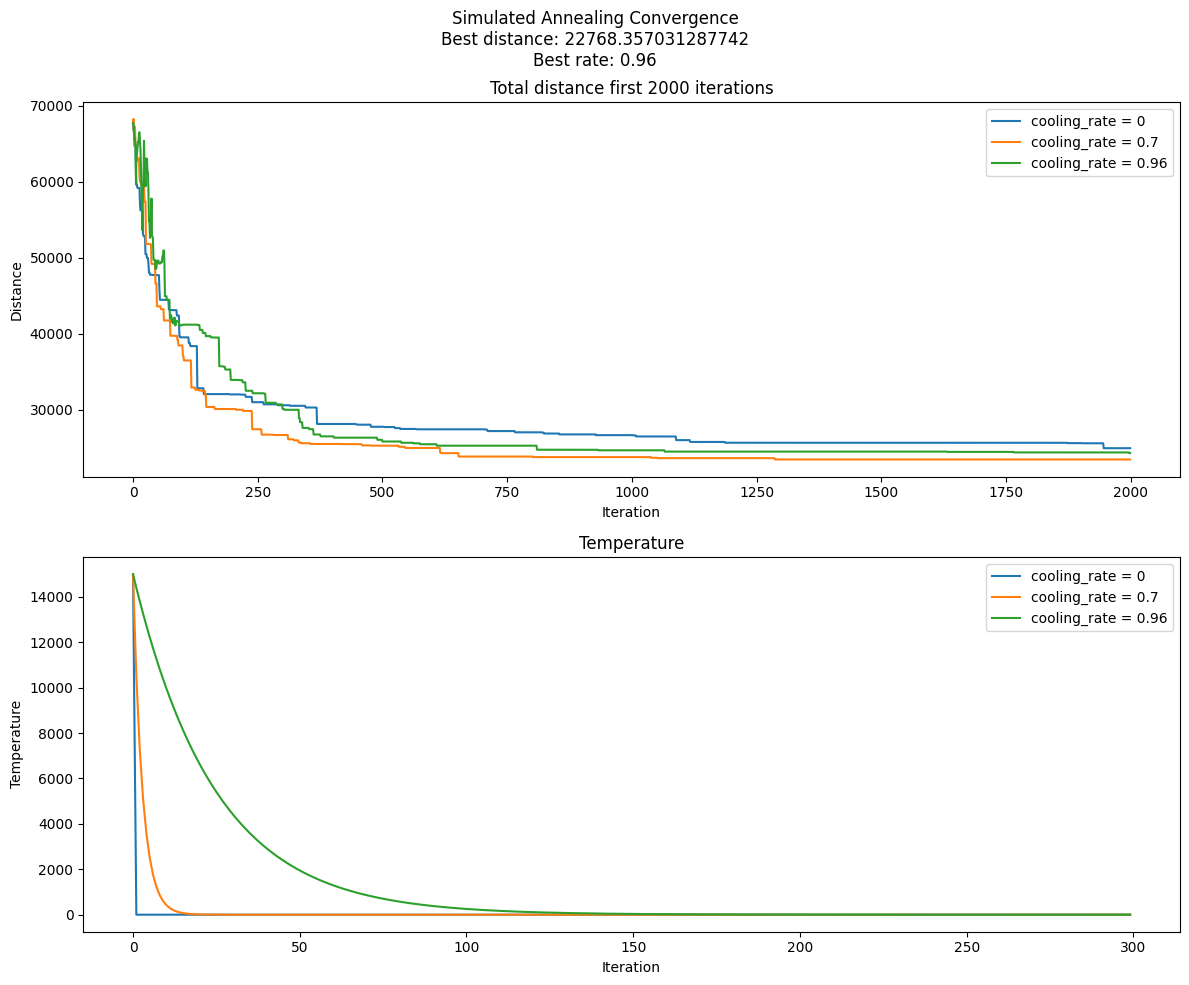

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle(f'Simulated Annealing Convergence\nBest distance: {best_distance}\nBest rate: {best_rate}')

for i, cooling_rate in enumerate(cooling_rates):
    distances = [res[1] for res in result_list[i][: 2000]]
    label = f"{cooling_rate = }"
    axes[0].plot(distances, label=label)


axes[0].set_ylabel('Distance')
axes[0].set_xlabel('Iteration')
axes[0].set_title(f'Total distance first 2000 iterations')
axes[0].legend()

for i, cooling_rate in enumerate(cooling_rates):
    distances = [res[2] for res in result_list[i][:300]]
    label = f"{cooling_rate = }"
    axes[1].plot(distances, label=label)
axes[1].set_ylabel('Temperature')
axes[1].set_xlabel('Iteration')
axes[1].set_title('Temperature')
axes[1].legend()

plt.tight_layout()
plt.show()


Let`s make some conclusions based on provided graphics.

As we can notice, in such case the best solution was with cooling rate 0, which was more stable than 0.96.

The temperature changes slower with greater value of cooling rate.

### Evaluation on 1000 tests

Following code collects statistics about 1000 iterations of testing algorithm on different cooling rates parameters.

On every iteration algorithm starts with the same random order of cities for different cooling rates in order to get fair results

In [22]:
num_iter = 1000
best = []
cooling_rates = [0, 0.7, 0.96]
small_conv = []
med_conv = []
max_conv = []
for i in range(num_iter):
    init_path = list(range(len(city_df)))
    random.shuffle(init_path)
    if i % 100 == 0:
        print(f"Step: {i//100}")
    initial_temp = 15000
    
    result_list = []
    
    result_list = [list(tsp_simulated_annealing(init_path, initial_temp, cooling_rate, distance_matrix))
                   for cooling_rate in cooling_rates]
    min_distance = float('inf')
    min_index = None
    
    for i, result in enumerate(result_list):
        distance = result[-1][1]
        if distance < min_distance:
            min_distance = distance
            min_index = i
    best_distance = result_list[min_index][-1][1]
    best_rate = cooling_rates[min_index]
    best.append(best_rate)
    small_conv.append(result_list[0][-1][3])
    med_conv.append(result_list[1][-1][3])
    max_conv.append(result_list[2][-1][3])

Step: 0
Step: 1
Step: 2
Step: 3
Step: 4
Step: 5
Step: 6
Step: 7
Step: 8
Step: 9


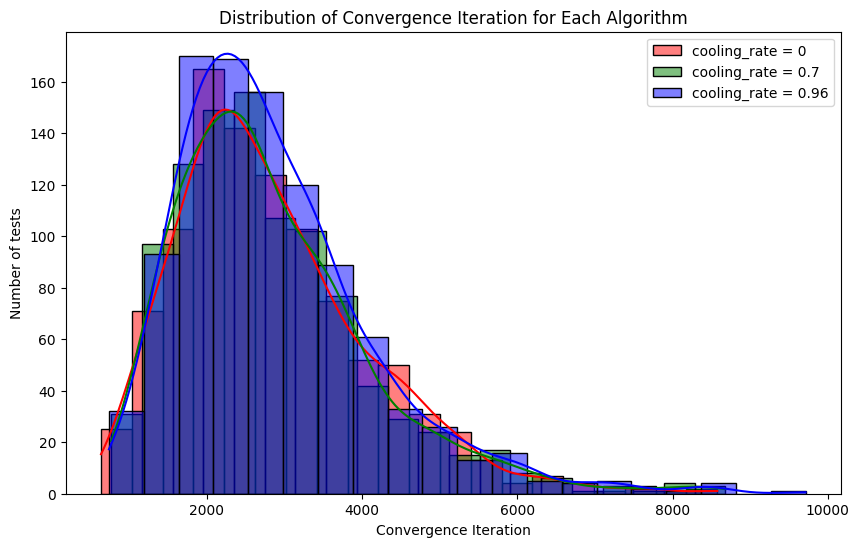

In [23]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(small_conv, bins=20, kde=True, color='r', label='cooling_rate = 0')
sns.histplot(med_conv, bins=20, kde=True, color='g', label='cooling_rate = 0.7')
sns.histplot(max_conv, bins=20, kde=True, color='b', label='cooling_rate = 0.96')

plt.xlabel('Convergence Iteration')
plt.ylabel('Number of tests')
plt.title('Distribution of Convergence Iteration for Each Algorithm')
plt.legend()

plt.show()

- **H0: (null hypothesis)** Results for different cooling rates follows the same distribution.
- **H1: (alternative hypothesis)** Results for different cooling rates follows different distribution.


In [24]:
from scipy import stats

ks_statistic, p_value = stats.kstest(small_conv, med_conv)
print("Pvalue for 0 and 0.7: ", p_value)
ks_statistic, p_value = stats.kstest(max_conv, med_conv)
print("Pvalue for 0.96 and 0.7: ", p_value)
ks_statistic, p_value = stats.kstest(max_conv, small_conv)
print("Pvalue for 0.96 and 0: ", p_value)

Pvalue for 0 and 0.7:  0.7946637387576738
Pvalue for 0.96 and 0.7:  0.5728904395829821
Pvalue for 0.96 and 0:  0.7228251828701066


Surpisingly, but for all cases we fail to reject null hypethesis(p_value > 0.05).
Results for different cooling rates follows the same distribution.

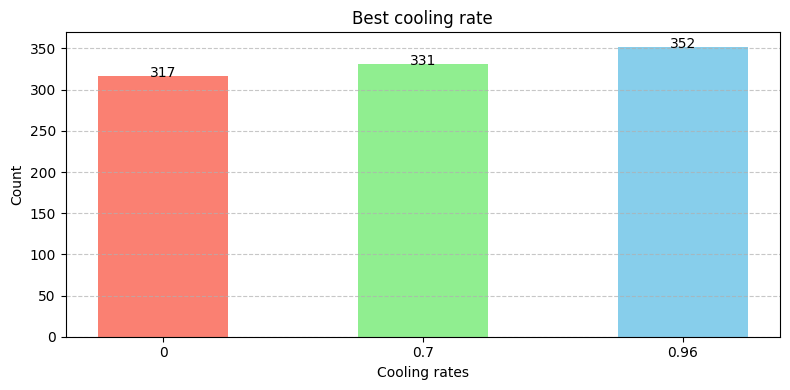

In [25]:
unique, counts = np.unique(best, return_counts=True)


plt.figure(figsize=(8, 4))
bars = plt.bar([1,2,3], counts, color=['salmon', 'lightgreen', 'skyblue' ], width=0.5)  # Set the same width for all bars

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5,
             f'{count}', ha='center', va='bottom', fontsize=10)
plt.xticks([1, 2, 3], cooling_rates)
plt.xlabel('Cooling rates')
plt.ylabel('Count')
plt.title('Best cooling rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  

plt.show()

However, as we can notice, 0.96 is a bit more efficient(get the best results a bit more often)